In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("prices.csv", parse_dates=["Date"])
df = df.sort_values("Date")  # make sure dates are in order
df.set_index("Date", inplace=True)

# Keep only the price columns (all non-date columns)
price_cols = df.columns
prices = df[price_cols]

# ==========================
# 2. COMPUTE DAILY RETURNS
# ==========================
# Simple returns: r_t = P_t / P_{t-1} - 1
returns = prices.pct_change().dropna()

# ==========================
# 3. DAILY MEAN & STD
# ==========================
mean_daily = returns.mean()                  # expected daily return
std_daily = returns.std(ddof=1)              # daily volatility (sample std)

# ==========================
# 4. ANNUALISE (252 TRADING DAYS)
# ==========================
TRADING_DAYS = 252

# Annual expected return: (1 + r̄_daily)^252 - 1
mean_annual = (1 + mean_daily) ** TRADING_DAYS - 1

# Annual volatility: σ_annual = σ_daily * sqrt(252)
std_annual = std_daily * np.sqrt(TRADING_DAYS)

df

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6
Date,,,,,,
2020-01-02,100.0,50.0,30.0,90.0,60.0,40.0
2020-01-03,101.0,50.5,29.8,89.0,59.5,40.3
2020-01-06,100.8,51.0,30.5,90.2,60.1,41.0


In [10]:
price_cols

Index(['Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5', 'Stock_6'], dtype='object')

/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_75929/1244145221.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(summary.applymap(lambda x: f"{x*100:.2f}%"))


        Annual Expected Return Annual Std Dev
Stock_1                174.14%         13.45%
Stock_2               1112.33%          0.11%
Stock_3                725.54%         33.85%
Stock_4                 34.81%         27.61%
Stock_5                 24.67%         20.67%
Stock_6               2151.68%         11.08%


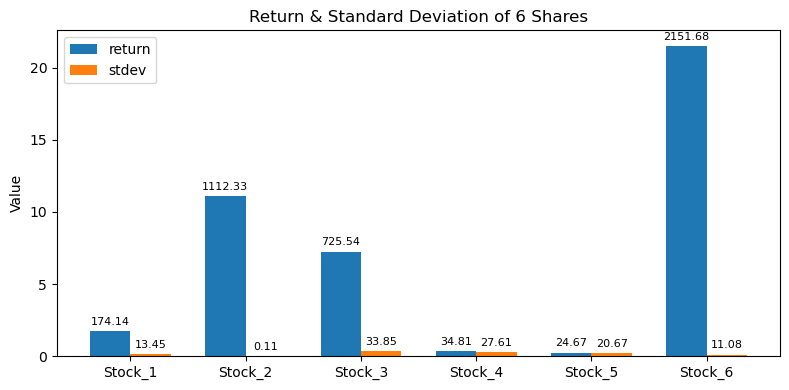

In [2]:

# ==========================
# 1. LOAD PRICE DATA
# ==========================
# Assumes a file 'prices.csv' with columns:
# Date, Stock_1, Stock_2, ..., Stock_6
df = pd.read_csv("prices.csv", parse_dates=["Date"])
df = df.sort_values("Date")  # make sure dates are in order
df.set_index("Date", inplace=True)

# Keep only the price columns (all non-date columns)
price_cols = df.columns
prices = df[price_cols]

# ==========================
# 2. COMPUTE DAILY RETURNS
# ==========================
# Simple returns: r_t = P_t / P_{t-1} - 1
returns = prices.pct_change().dropna()

# ==========================
# 3. DAILY MEAN & STD
# ==========================
mean_daily = returns.mean()                  # expected daily return
std_daily = returns.std(ddof=1)              # daily volatility (sample std)

# ==========================
# 4. ANNUALISE (252 TRADING DAYS)
# ==========================
TRADING_DAYS = 252

# Annual expected return: (1 + r̄_daily)^252 - 1
mean_annual = (1 + mean_daily) ** TRADING_DAYS - 1

# Annual volatility: σ_annual = σ_daily * sqrt(252)
std_annual = std_daily * np.sqrt(TRADING_DAYS)

# Optional: print the table
summary = pd.DataFrame({
    "Annual Expected Return": mean_annual,
    "Annual Std Dev": std_annual
})
print(summary.applymap(lambda x: f"{x*100:.2f}%"))

# ==========================
# 5. PLOT BAR CHART (LIKE SLIDE)
# ==========================
stocks = price_cols
x = np.arange(len(stocks))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))

bars_return = ax.bar(x - width/2, mean_annual, width, label='return')
bars_std    = ax.bar(x + width/2, std_annual, width, label='stdev')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(stocks)
ax.set_ylabel("Value")
ax.set_title("Return & Standard Deviation of 6 Shares")
ax.legend()

# Add percentage labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height*100:.2f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

add_labels(bars_return)
add_labels(bars_std)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# historical daily returns for A and B
returns_A = np.array([0.01, 0.02, -0.01, 0.03, 0.00])
returns_B = np.array([0.00, 0.03, 0.01, 0.04, -0.02])

# 1️⃣ Compute correlation matrix
corr_matrix = np.corrcoef(returns_A, returns_B)

# 2️⃣ Extract the correlation value (off-diagonal element)
corr_AB = corr_matrix[0, 1]

print("Correlation matrix:\n", corr_matrix)
print("Correlation (rho):", corr_AB)


import pandas as pd

returns_A = pd.Series([0.01, 0.02, -0.01, 0.03, 0.00])
returns_B = pd.Series([0.00, 0.03, 0.01, 0.04, -0.02])

corrValue = returns_A.corr(returns_B)
print(corrValue)

# corr_AB and corrValue should be the same


Correlation matrix:
 [[1.        0.7284928]
 [0.7284928 1.       ]]
Correlation (rho): 0.728492796385774
0.728492796385774


In [16]:
pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 51.5 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=4726bfe743392a5c451ea51659d33f2985fd1410c9af027e0716447ba6de61fe
  Stored in directory: /Users/arshad/Library/Caches/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-macosx_10_15_x86_64.whl size=273925 sha256=9c6a9290c51e3ab514ae47548c9476ca228bf8d7b06192aade5e90f8c113b169
  Stored in directory: /Users/arshad/Library/Caches/pip/wheels/e2/48/b6/675a31c56e50b8b343e1ffbb1d9209f0d95025e2cfa0bbeeed
Successfully built multitasking peewee
Note: you may need to restart the kernel to use u

[*********************100%***********************]  2 of 2 completed


Correlation matrix:
Ticker      AAPL      TSLA
Ticker                    
AAPL    1.000000  0.577579
TSLA    0.577579  1.000000

Correlation (AAPL ↔ TSLA): 0.5776


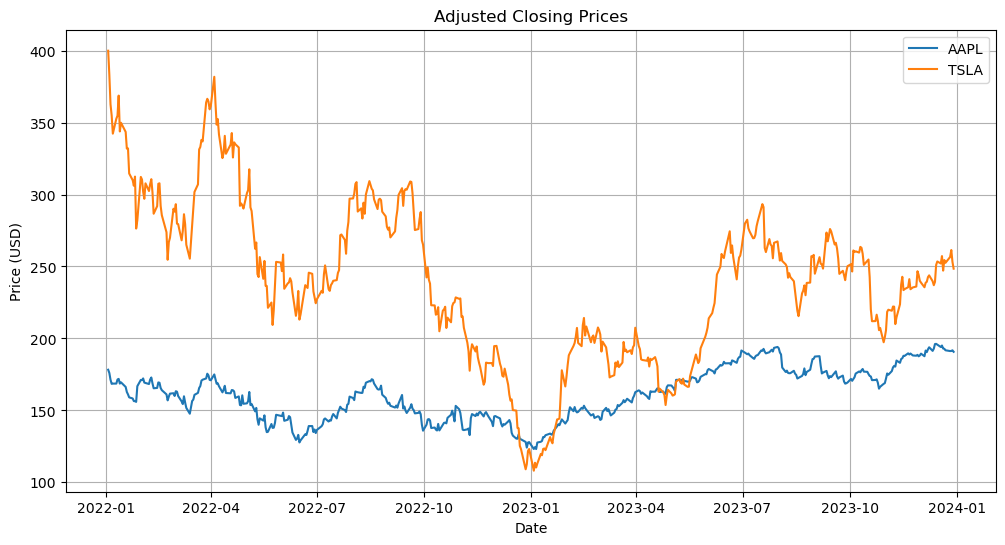

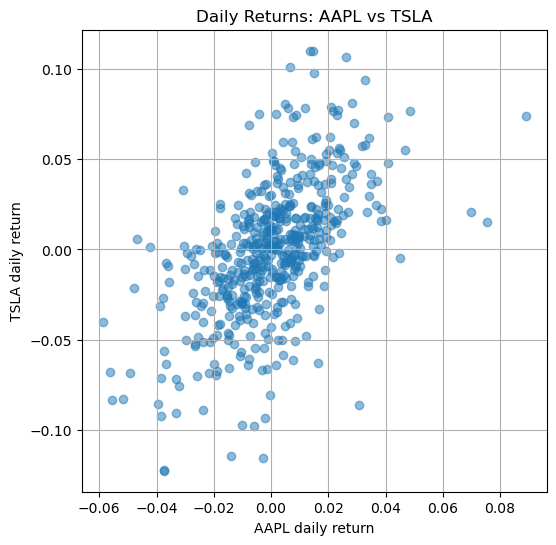


Portfolio expected annual return: 0.91%
Portfolio annual risk (std dev): 40.27%


In [18]:
# === Import libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# === Configuration ===
tickers = ["AAPL", "TSLA"]
start_date = "2022-01-01"
end_date = "2023-12-31"

# === 1. Download historical data ===
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]

# === 2. Compute daily returns ===
returns = data.pct_change().dropna()

# === 3. Compute correlation ===
corr_matrix = returns.corr()
rho = corr_matrix.loc["AAPL", "TSLA"]

print("Correlation matrix:")
print(corr_matrix)
print(f"\nCorrelation (AAPL ↔ TSLA): {rho:.4f}")

# === 4. Plot adjusted closing prices ===
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Adjusted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# === 5. Plot scatter of returns ===
plt.figure(figsize=(6,6))
plt.scatter(returns["AAPL"], returns["TSLA"], alpha=0.5)
plt.title("Daily Returns: AAPL vs TSLA")
plt.xlabel("AAPL daily return")
plt.ylabel("TSLA daily return")
plt.grid(True)
plt.show()

# === 6. Compute portfolio stats for chosen weights ===
weights = np.array([0.5, 0.5])  # e.g., 50% AAPL, 50% TSLA

mean_returns = returns.mean() * 252  # annualize by approx 252 trading days
cov_matrix = returns.cov() * 252  # annualized covariance matrix

port_return = weights @ mean_returns
port_variance = weights @ cov_matrix @ weights
port_risk = np.sqrt(port_variance)

print(f"\nPortfolio expected annual return: {port_return*100:.2f}%")
print(f"Portfolio annual risk (std dev): {port_risk*100:.2f}%")
